# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [215]:
# Import your libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA






![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [3]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [4]:
train_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### Test dataset


In [207]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [6]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


#### Sample submission

In [7]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [8]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

## Exploring the data:

Let's explore first how does the raw data looks like. I will look at the datatypes, presence of null values, outlayers, and the relationship among features:

In [23]:
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

All the features are in the correct type. That's good.

In [24]:
train_dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

There are no null values. That's also a good thing.

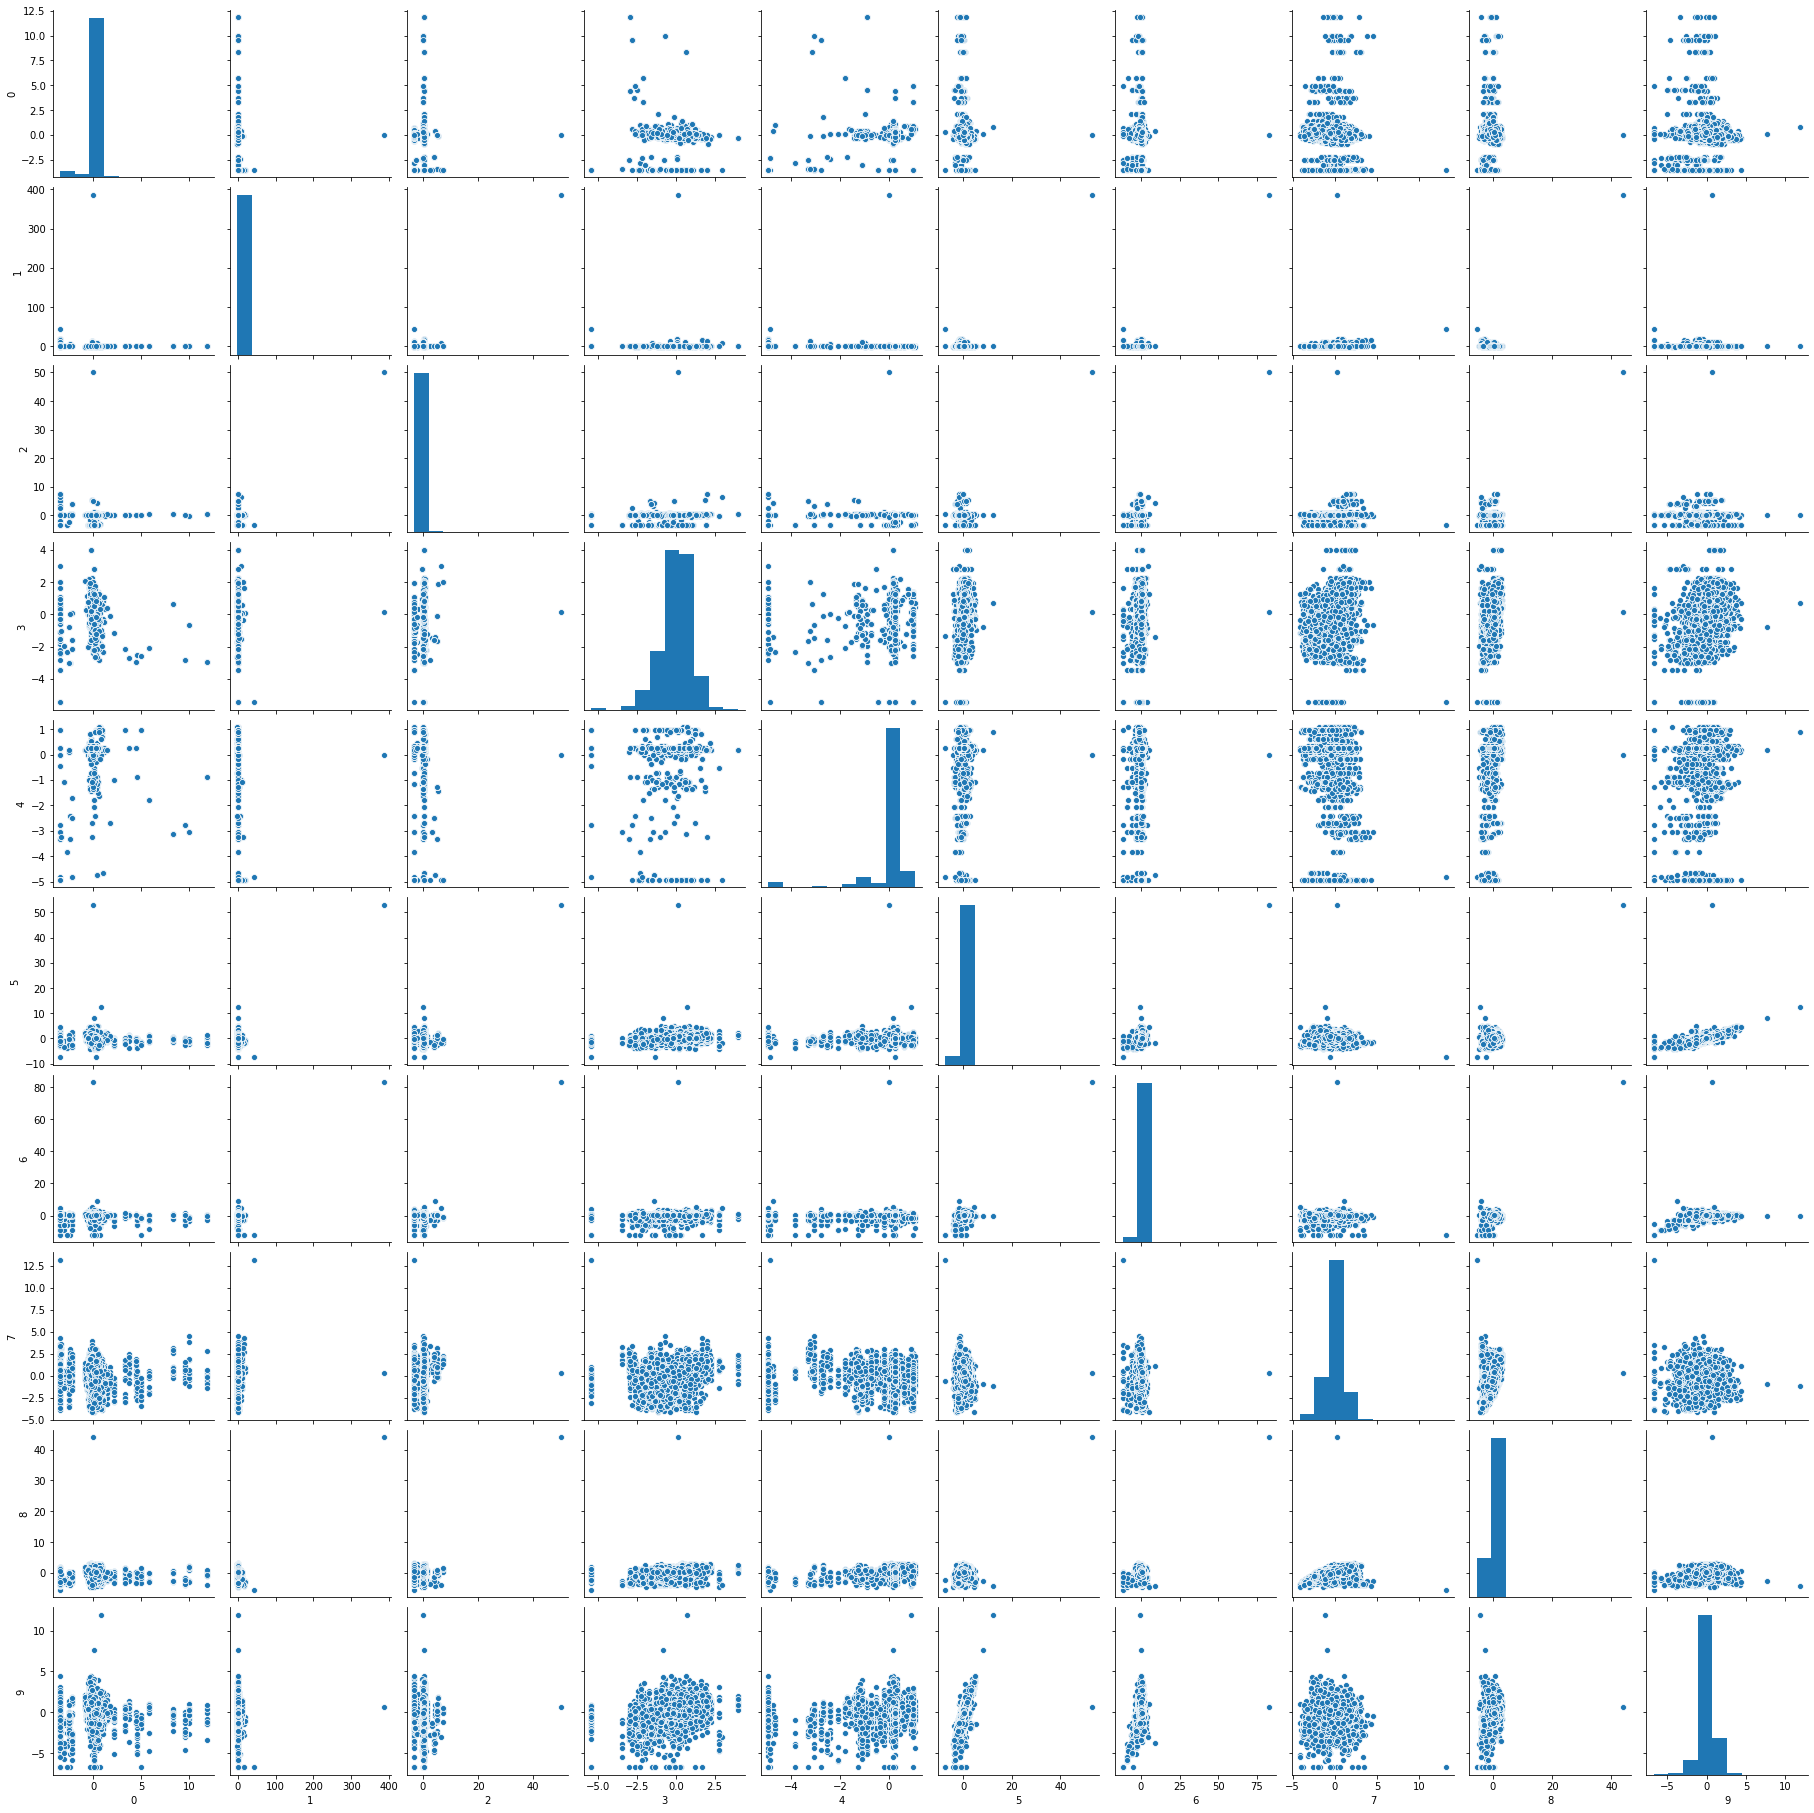

In [26]:
sns.pairplot(train_dataset[:-1])

There are some features that present some correlation. That something that can be explored later.

In [50]:
#Pearson correlation
print(scipy.stats.pearsonr(train_dataset['5'], train_dataset['9']))
print(scipy.stats.pearsonr(train_dataset['6'], train_dataset['9']))

(0.776504248341372, 0.0)
(0.2994667358516918, 1.749373721786404e-247)


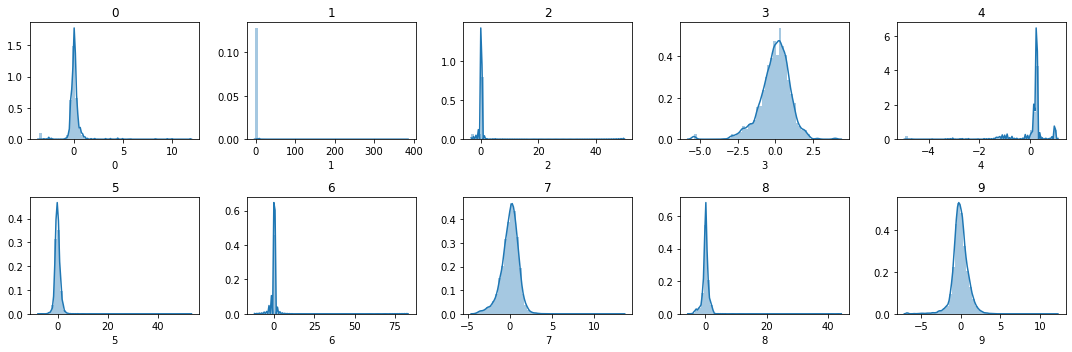

In [73]:
f, ax = plt.subplots(2,5, figsize = (15,5))
for i in range(10):
    sns.distplot(train_dataset[str(i)], ax = ax[(0 if i<5 else 1),(i if i<5 else i-5)])
    ax[(0 if i<5 else 1),(i if i<5 else i-5)].set_title(str(i))
plt.tight_layout()

There are some distributions with many outlayers. I can check them out more carefully with boxplots one by one:

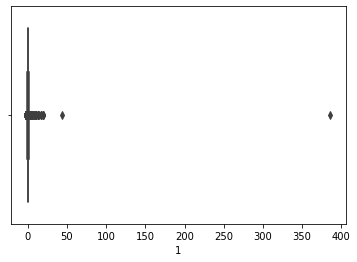

In [74]:
sns.boxplot(train_dataset['1'])

## Data engineering:

**Removing outlayers**

One could apply logarithms to the disperse columns, however, since the features are already standardized, there are negative numbers that will result in NAs in when applying the function, therefore, We can just get rid of the outlayers by using the z score:

In [208]:
data_clean = train_dataset.drop(columns='10')
data_clean = data_clean[(np.abs(scipy.stats.zscore(data_clean)) < 3).all(axis=1)]
data_clean['10'] = train_dataset['10']

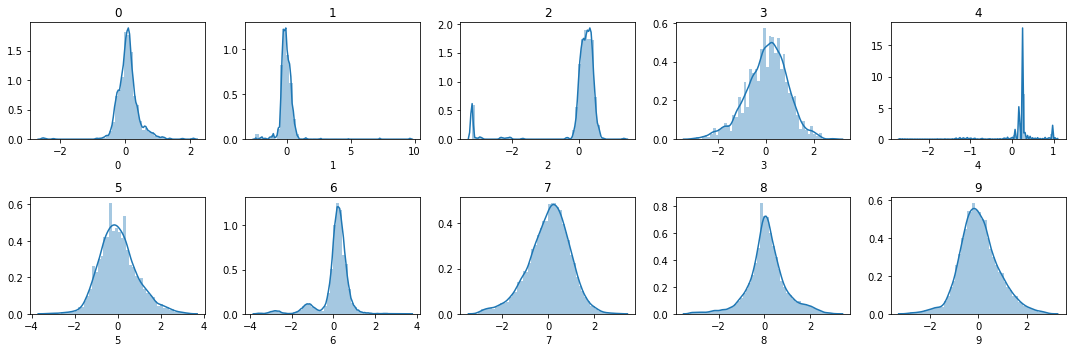

In [177]:
f, ax = plt.subplots(2,5, figsize = (15,5))
for i in range(10):
    sns.distplot(data_clean[str(i)], ax = ax[(0 if i<5 else 1),(i if i<5 else i-5)])
    ax[(0 if i<5 else 1),(i if i<5 else i-5)].set_title(str(i))
plt.tight_layout()

**Outlayers and without sparse features**

Here I will remove columns 2 and 4 that are very sparsely distributed even after removing the outlayers. Maybe that affects the accuracy of the model:

In [199]:
data_clean.drop(columns=['2', '4'], inplace=True)

In [200]:
#Test data:
test_dataset.drop(columns=['2', '4'], inplace=True)


**Reduction of dimensionality**

I will try to reduce the dimensionality to only two and three dimensions and fit a machine learning model to that and see how it behaves:

In [233]:
pca = PCA(n_components=5)
train = pca.fit_transform(train_dataset.drop(columns='10'))

In [234]:
train_pca = pd.DataFrame(train)

In [235]:
#For the predict data:
test = pca.fit_transform(test_dataset)

## Spliting the data:

In [236]:
X_train, X_test, y_train, y_test = train_test_split(train, train_dataset['10'], test_size=0.2)


## Modeling:

### Fit the models and check__RAW DATA

In [237]:
models = {
    "logis": LogisticRegression(C=10,solver="lbfgs", max_iter=150),
    "gradient descend": SGDClassifier(loss="hinge", penalty="l2", max_iter=5, shuffle=True),
    "naive bayes" : GaussianNB(),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=5),
    "randomforest": RandomForestClassifier(n_estimators=100),
    "decisiontree" : DecisionTreeClassifier(random_state=0)
}

# Train all the models in the models dict
for name,m  in models.items():
    print(f"Trainning {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Trainning logis...
Trainning gradient descend...
Trainning naive bayes...
Trainning svm-rbf...


/home/david/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Trainning randomforest...
Trainning decisiontree...
Train complete


In [238]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name} model------")
    print("Accuracy",round(accuracy_score(y_test, y_pred),3))
    print("Precision",round(precision_score(y_test, y_pred, average = 'weighted'),3))
    print("Recall",round(recall_score(y_test, y_pred, average = 'weighted'),3))
    print("F1Score",round(f1_score(y_test, y_pred, average = 'weighted'),3))


------logis model------
Accuracy 0.51
Precision 0.324
Recall 0.51
F1Score 0.381
------gradient descend model------
Accuracy 0.461
Precision 0.411
Recall 0.461
F1Score 0.419
------naive bayes model------
Accuracy 0.268
Precision 0.409
Recall 0.268
F1Score 0.258


/home/david/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------svm-rbf model------
Accuracy 0.421
Precision 0.177
Recall 0.421
F1Score 0.249
------randomforest model------
Accuracy 0.697
Precision 0.697
Recall 0.697
F1Score 0.685
------decisiontree model------
Accuracy 0.559
Precision 0.571
Recall 0.559
F1Score 0.564


/home/david/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predict:

In [239]:
prediction = models['randomforest'].predict(test)
prediction_df = pd.DataFrame(prediction)
prediction_df.head()

,0
0,Marcus
1,Coronavirucus
2,Marcus
3,Marcus
4,Marcus


## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [240]:
prediction_df.to_csv('../data/submission.csv', header=None)

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

For the Random forest using the raw data:

In [127]:
my_submission = "../data/submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.9892661008487269,
 'quote': "AWESOME! A-W-E-S-O-M-E! Amazing score!!! So cool! I can't even... But wait, maybe...too good to be true? Overfit much?",
 'tip': 'If you think you may have overfitted your model, visit http://apila-bible.herokuapp.com/check/overfit on your browser for some follow up. ;)'}

The data without outlayers improved the some models a little bit (precissions around 60%) except for the the random forest, that decreased a bit, even though it was still the best score with a preccission of 95%: 

In [214]:
my_submission = "../data/submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.9550673989016475,
 'quote': "Great job! That's an impressive score. Will you give it an extra push? Almost at the top, care for a final `boost`?"}

Removing the sparse distributed features does not do a lot of good. Probably one or both of them were good predictores. Still, random forest is the best model, but the accuracy was reduced by some points:

In [206]:
my_submission = "../data/submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.890664003994009,
 'quote': "It's good, but I'm sure you can do better! Try different models, adjust the hyperparameters, some fine tuning can lead you a long way."}

Well, dimensionality reduction is a very bad idea in this data. All models do much worse and some of them cannot even converge. There are not that many features in this dataset, so this strategy may not be necessary. Maybe when one has a number of features some orders larger than this, this might make sense:

In [241]:
my_submission = "../data/submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.3720668996505242,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)